# Minimal tracking examples using NumPy

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # for high DPI displays in MacOS

In [2]:
import numpy as np

In [3]:
# Create single particle
from bmadx import Particle, M_ELECTRON

coords = np.ones(6)*1e-3
s = 0.0
p0c = 4e7
p = Particle(*coords, s, p0c, M_ELECTRON)
# Particle is a named tuple with: cannonical coords (x, px, y, py, z, pz), s, p0c, mc2:
p

Particle(x=0.001, px=0.001, y=0.001, py=0.001, z=0.001, pz=0.001, s=0.0, p0c=40000000.0, mc2=510998.94999999995)

In [4]:
# Access elements by name using dot notation:
p.x

0.001

In [5]:
# Create particle beam
n_particles = 10_000 # number of particles in beam
coords = np.random.multivariate_normal(mean = np.zeros(6),
                                       cov = 1e-6*np.identity(6),
                                       size = n_particles
                                      )
beam = Particle(*coords.T, s, p0c, M_ELECTRON)
beam

Particle(x=array([ 0.00092636,  0.00146798,  0.00118915, ...,  0.00095321,
        0.00065277, -0.00050456]), px=array([ 6.14160735e-04, -1.00654940e-03,  7.63846994e-05, ...,
       -7.91042292e-04,  1.67114769e-04,  2.18488469e-03]), y=array([-0.0009564 , -0.00160297,  0.00017236, ..., -0.0010561 ,
       -0.00056936, -0.00192811]), py=array([-2.57791864e-03, -4.62728558e-05, -1.07945817e-03, ...,
        1.28435155e-03,  2.01057063e-04, -5.57208114e-04]), z=array([1.24303940e-03, 1.06396319e-04, 1.62540707e-03, ...,
       9.84196916e-04, 1.19970434e-05, 5.75175300e-04]), pz=array([-0.0010642 ,  0.00036681,  0.00038136, ...,  0.00121602,
        0.0013161 , -0.00049984]), s=0.0, p0c=40000000.0, mc2=510998.94999999995)

Text(0, 0.5, '$y$ (mm)')

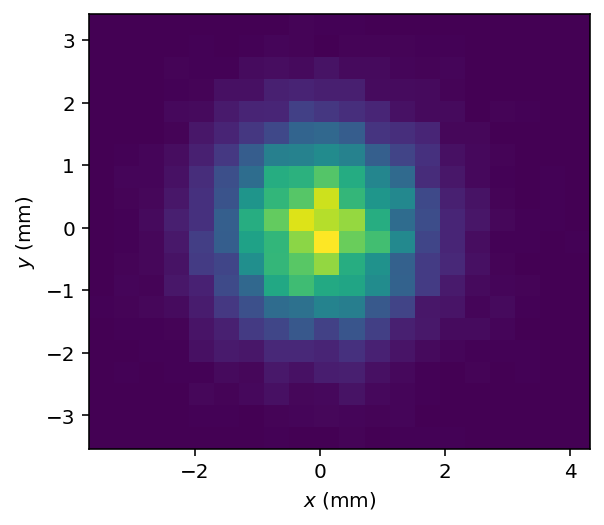

In [6]:
# plot beam x,y histogram:
fig, ax = plt.subplots()
ax.hist2d(beam.x*1e3, beam.y*1e3, bins=(20,20))
ax.set_aspect('equal')
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'$y$ (mm)')

In [7]:
# Create a drift element: 
from bmadx import Drift

d = Drift(L=1.0)
# Drift is a named tuple with: L (drift length): 
d

Drift(L=1.0)

In [8]:
# Track though drift
from bmadx import track_element

track_element(beam, d) # returns outgoing particle beam

Particle(x=array([0.00154118, 0.0004618 , 0.00126551, ..., 0.00016313, 0.00081967,
       0.00168143]), px=array([ 6.14160735e-04, -1.00654940e-03,  7.63846994e-05, ...,
       -7.91042292e-04,  1.67114769e-04,  2.18488469e-03]), y=array([-0.00353708, -0.00164923, -0.00090669, ...,  0.00022669,
       -0.00036857, -0.0024856 ]), py=array([-2.57791864e-03, -4.62728558e-05, -1.07945817e-03, ...,
        1.28435155e-03,  2.01057063e-04, -5.57208114e-04]), z=array([1.23934654e-03, 1.05948869e-04, 1.62488418e-03, ...,
       9.83260083e-04, 1.21772861e-05, 5.72549025e-04]), pz=array([-0.0010642 ,  0.00036681,  0.00038136, ...,  0.00121602,
        0.0013161 , -0.00049984]), s=1.0, p0c=40000000.0, mc2=510998.94999999995)

In [9]:
# Create a quarupole element:
from bmadx import Quadrupole

q_focus = Quadrupole(L=0.1, K1=10.0)
# Quadrupole is a named tuple with: L, K1, X_OFFSET=0, Y_OFFSET=0, TILT=0
q_focus

Quadrupole(L=0.1, K1=10.0, NUM_STEPS=1, X_OFFSET=0.0, Y_OFFSET=0.0, TILT=0.0)

In [10]:
# Track though quadrupole
track_element(beam, q_focus)

Particle(x=array([ 0.00094084,  0.00129627,  0.00113772, ...,  0.0008283 ,
        0.00063686, -0.00026456]), px=array([-0.0003273 , -0.0024003 , -0.00109684, ..., -0.00168929,
       -0.00048312,  0.00257268]), y=array([-1.26707002e-03, -1.68846498e-03,  7.13369531e-05, ...,
       -9.78855894e-04, -5.77614323e-04, -2.08205686e-03]), py=array([-0.00368047, -0.00167842, -0.00095861, ...,  0.00027526,
       -0.00036771, -0.00254574]), z=array([1.24252961e-03, 1.06199157e-04, 1.62534322e-03, ...,
       9.84101295e-04, 1.20137669e-05, 5.74743569e-04]), pz=array([-0.0010642 ,  0.00036681,  0.00038136, ...,  0.00121602,
        0.0013161 , -0.00049984]), s=0.1, p0c=40000000.0, mc2=510998.94999999995)

In [11]:
# Track through a lattice
from bmadx import track_lattice

q_defocus =  Quadrupole(L=0.1, K1=-10.0)
lat = [d, q_focus, d, q_defocus, d, q_focus, d] # lattice is a list of elements
track_lattice(beam, lat) # returns outgoing particle beam

Particle(x=array([-0.0004007 , -0.00256934, -0.00120779, ..., -0.00180381,
       -0.0005395 ,  0.00268053]), px=array([-5.05646307e-04,  1.33052091e-03,  1.15914571e-04, ...,
        1.00980089e-03, -7.26404830e-05, -2.44339742e-03]), y=array([-0.00820385, -0.00147304, -0.00296403, ...,  0.0028157 ,
        0.00010166, -0.00320802]), py=array([-0.00203762,  0.00012911, -0.00092034, ...,  0.00118605,
        0.00022712, -0.00025829]), z=array([1.20580604e-03, 9.74007359e-05, 1.62022752e-03, ...,
       9.79007490e-04, 1.23932770e-05, 5.56093492e-04]), pz=array([-0.0010642 ,  0.00036681,  0.00038136, ...,  0.00121602,
        0.0013161 , -0.00049984]), s=4.300000000000001, p0c=40000000.0, mc2=510998.94999999995)

In [12]:
# Track through a lattice saving stats after each element
from bmadx import track_lattice_save_stats

all_p = track_lattice_save_stats(beam, lat) 
# returns a dictionary with stats after each element

Text(0, 0.5, 'beam size (mm)')

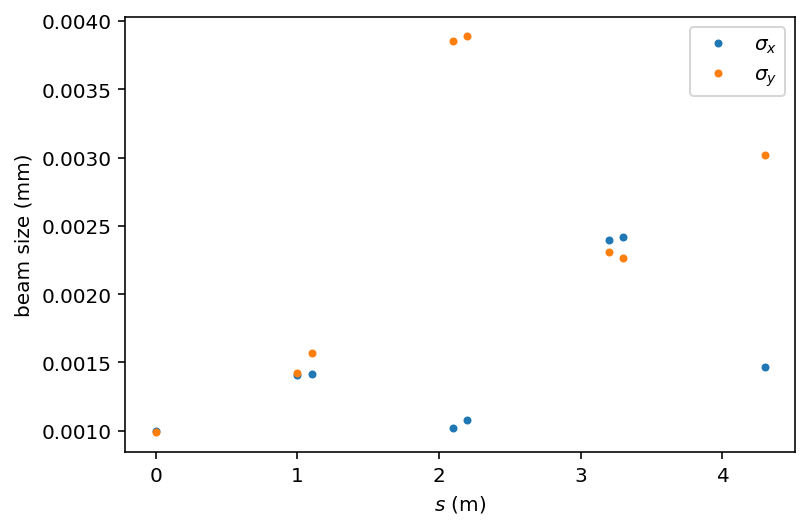

In [13]:
# Plot x and y beamsize though lattice:

plt.plot(all_p['s'], all_p['sigma_x'], '.', label = r'$\sigma_x$')
plt.plot(all_p['s'], all_p['sigma_y'], '.', label = r'$\sigma_y$')
plt.legend()
plt.xlabel(r'$s$ (m)')
plt.ylabel(r'beam size (mm)')

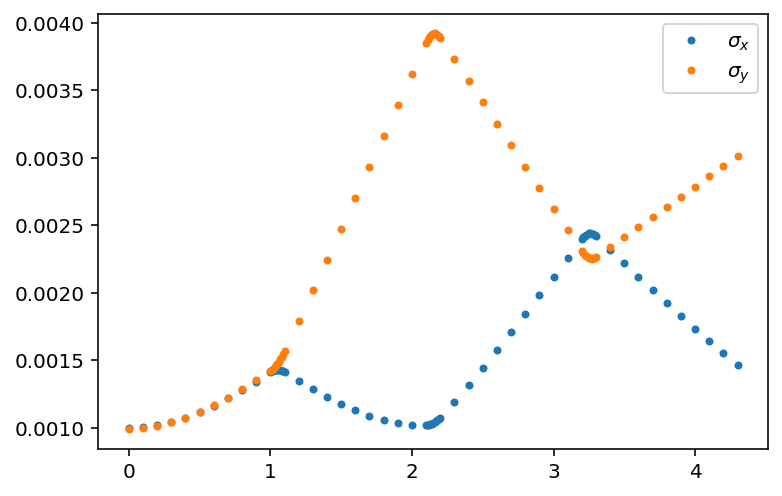

In [14]:
# one can slice every element in the lattice for plotting purposes:

stats = track_lattice_save_stats(beam, lat, n_slices=10)
plt.plot(stats['s'], stats['sigma_x'], '.', label=r'$\sigma_x$')
plt.plot(stats['s'], stats['sigma_y'], '.', label=r'$\sigma_y$')
plt.legend()